In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
Fortune=pd.read_excel('E:\Python\Data\Fortune50.xlsx')
Fortune.head()

,Rank,Company,Revenues,Profits,Assets,Stockholders Equity,Market Value,Earnings per share,Total Return to Investors 1997,Employees
0,1,General Electric,90840.0,8203.0,304012.0,34438.0,260147.17,2.46,51.09,276000
1,2,Ford Motor,153627.0,6920.0,279097.0,30734.0,73923.00,5.62,57.01,363892
2,3,General Motors,178174.0,6698.0,228888.0,17506.0,54243.84,8.62,19.47,608000
3,4,Exxon,122379.0,8460.0,96064.0,43660.0,158783.63,3.37,28.33,80000
4,5,Citicorp,34697.0,3591.0,310897.0,21196.0,66105.35,7.33,24.85,93700


<AxesSubplot:xlabel='Employees', ylabel='Profits'>

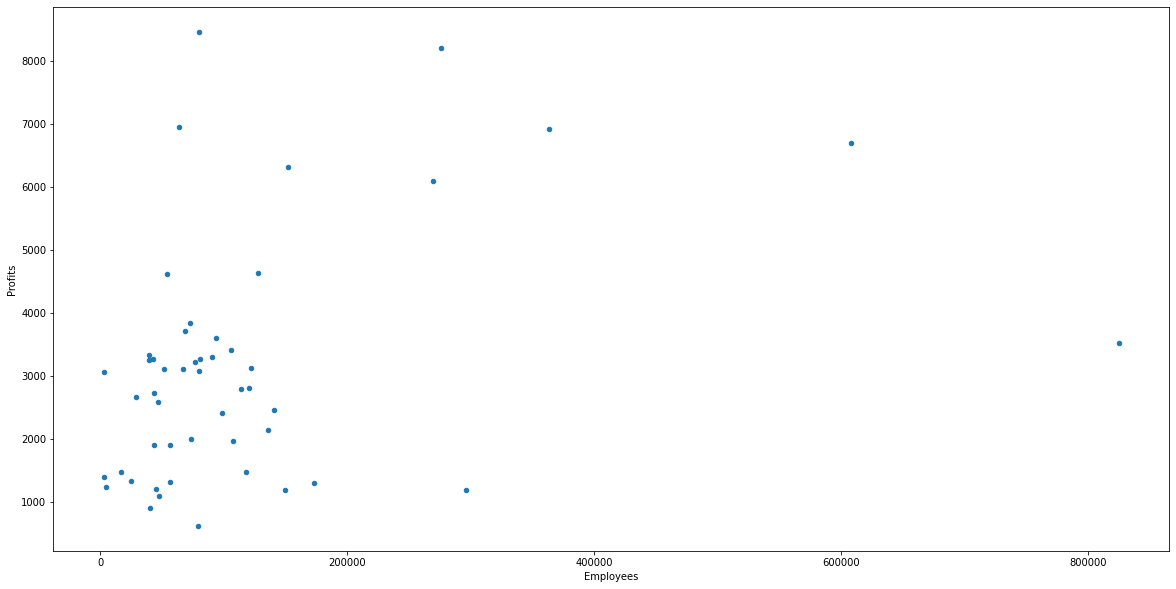

In [3]:
Fortune.plot.scatter(x='Employees',y='Profits',figsize=[20,10])

In [4]:
Fortune.corr(method='spearman').style.background_gradient(cmap='coolwarm')

,Rank,Revenues,Profits,Assets,Stockholders Equity,Market Value,Earnings per share,Total Return to Investors 1997,Employees
Rank,1.000000,-0.634478,-0.672029,-0.596927,-0.686723,-0.343084,-0.301928,-0.274646,-0.148479
Revenues,-0.634478,1.000000,0.562065,-0.011381,0.514718,0.334390,-0.029347,-0.072864,0.497923
Profits,-0.672029,0.562065,1.000000,0.013878,0.716399,0.739866,0.214655,0.244386,0.319864
Assets,-0.596927,-0.011381,0.013878,1.000000,0.297479,-0.180163,0.265136,0.282716,-0.251579
Stockholders Equity,-0.686723,0.514718,0.716399,0.297479,1.000000,0.469933,0.180696,0.101924,0.174890
Market Value,-0.343084,0.334390,0.739866,-0.180163,0.469933,1.000000,-0.034880,0.465445,0.409088
Earnings per share,-0.301928,-0.029347,0.214655,0.265136,0.180696,-0.034880,1.000000,0.088738,-0.224795
Total Return to Investors 1997,-0.274646,-0.072864,0.244386,0.282716,0.101924,0.465445,0.088738,1.000000,0.039555
Employees,-0.148479,0.497923,0.319864,-0.251579,0.174890,0.409088,-0.224795,0.039555,1.000000


In [5]:
#producing spearman correlation
from scipy.stats import spearmanr
data1= Fortune['Employees']
data2= Fortune['Profits']
stat,p=spearmanr(data1,data2)
print('Spearman Correlation=%.3f, p-value=%.3f'%(stat,p))

Spearman Correlation=0.320, p-value=0.024


In [6]:
#Conducting hypothesis test to test either exists relationship
print('H0 - ρ = 0 (There are no correlation between variables)')
print('H1 - ρ ≠ 0 (There exists correlation between variables)')
cofidence_level=0.95
#calculate alpha (significance level)
alpha=round((1-cofidence_level),2)
print()
print('Significance level, α: ',alpha)
print()
if p< alpha:
    print('Using significance level of',alpha, 'and p-value =', p,'.H0 is rejected.')
    print('There EXISTS correlation between variables')
else:
    print('Using significance level of',alpha,'and p-value =', p,'.H0 is accepted.')
    print('There are NO correlation between variables')

H0 - ρ = 0 (There are no correlation between variables)
H1 - ρ ≠ 0 (There exists correlation between variables)

Significance level, α:  0.05

Using significance level of 0.05 and p-value = 0.023548106019917272 .H0 is rejected.
There EXISTS correlation between variables


In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.tools.eval_measures import rmse
import scipy.stats as st
import math 

#iniate constant_b0
X=Fortune['Employees']
X=sm.add_constant(X)
y=Fortune['Profits']
#Simple regression analysis
model=sm.OLS(y,X)
results = model.fit()
#can change your alpha level
alpha=0.05
#summary of the model
print(results.summary(alpha))
#print(model.summary(alpha))
#print the regression equation
print('y_hat =',round(results.params[1],4),'x +',round(results.params[0],4))
#regression diagnostic
print('MSR Value:',(results.mse_model).round(2))
MSE = results.mse_resid
print('MSE Value:',MSE.round(2))
RMSE = math.sqrt(MSE)
print('RMSE Value:%.3f'%RMSE)

                            OLS Regression Results                            
Dep. Variable:                   0.05   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     7.321
Date:                Wed, 03 Aug 2022   Prob (F-statistic):            0.00941
Time:                        14:55:36   Log-Likelihood:                -444.52
No. Observations:                  50   AIC:                             893.0
Df Residuals:                      48   BIC:                             896.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2556.8840    328.313      7.788      0.0

In [8]:
print("Predicted values: ",  results.predict().round(2))

Predicted values:  [3870.4  4288.68 5450.42 2937.61 3002.81 2885.42 2876.93 3839.3  2902.66
 2747.25 2573.54 3166.05 3280.27 2781.88 2826.25 2923.34 6483.15 3132.74
 2939.33 2760.1  2801.5  2579.84 3025.16 3227.92 2744.21 2770.94 3137.02
 2909.06 2637.52 2763.67 2696.39 2861.47 3061.35 3101.13 2942.37 3965.58
 2765.97 2783.89 3120.08 2812.92 2572.11 3070.87 2932.85 2675.86 2748.68
 2826.25 3380.21 2987.58 3270.75 3204.12]
